In [3]:
# visualize feature maps output from each block in the vgg model
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


# load the model
model = ResNet50()
print(model.layers[0].name)
# summarize the model
model.summary()


input_3
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________

In [3]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    if 'pad' in layer.name:
        continue
    if 'bn' in layer.name:
        continue
    if 'relu' in layer.name:
        continue
    if 'add' in layer.name:
        continue
    if 'out' in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

2 conv1_conv (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
29 conv2_block3_1_conv (None, 56, 56, 64)
32 conv2_block3_2_conv (None, 56, 56, 64)
35 conv2_block3_3_conv (None, 56, 56, 256)
39 conv3_block1_1_conv (None, 28, 28, 128)
42 conv3_block1_2_conv (None, 28, 28, 128)
45 conv3_block1_0_conv (None, 28, 28, 512)
46 conv3_block1_3_conv (None, 28, 28, 512)
51 conv3_block2_1_conv (None, 28, 28, 128)
54 conv3_block2_2_conv (None, 28, 28, 128)
57 conv3_block2_3_conv (None, 28, 28, 512)
61 conv3_block3_1_conv (None, 28, 28, 128)
64 conv3_block3_2_conv (None, 28, 28, 128)
67 conv3_block3_3_conv (None, 28, 28, 512)
71 conv3_block4_1_conv (None, 28, 28, 128)
74 conv3_block4_2_conv (None, 28, 28, 128)
77 conv3_block4_3_conv (Non

We can use this information and design a new model that is a subset of the layers in the full VGG16 model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer, which we know would be the activation of the layer or the feature map. For example, after loading the VGG model, we can define a new model that outputs a feature map from the first convolutional layer (index 1) as follows. Making a prediction with this model will give the feature map for the first convolutional layer for a given provided input image. 

In [5]:
from keras.models import Sequential

#create model
model1 = Sequential()
#add model layers
model1.add(model.layers[0])
model1.add(model.layers[7])
model1.add(model.layers[8])
model1.add(model.layers[9])
model1.summary()

ValueError: Input 0 of layer conv2_block1_1_conv is incompatible with the layer: expected axis -1 of input shape to have value 64 but received input with shape [None, 224, 224, 3]

In [9]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
# the image PIL object needs to be converted to a NumPy array of 
# pixel data and expanded from a 3D array to a 4D array with the 
# dimensions of [samples, rows, cols, channels], where we only 
# have one sample.
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
# See https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
img = preprocess_input(img)

In [ ]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

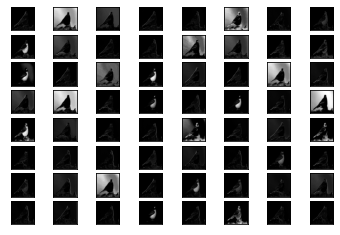

In [12]:
# The result will be a feature map with 224x224x64. 
# We can plot all 64 two-dimensional images as an 8×8 square of images.
# plot the output from each block
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()